11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


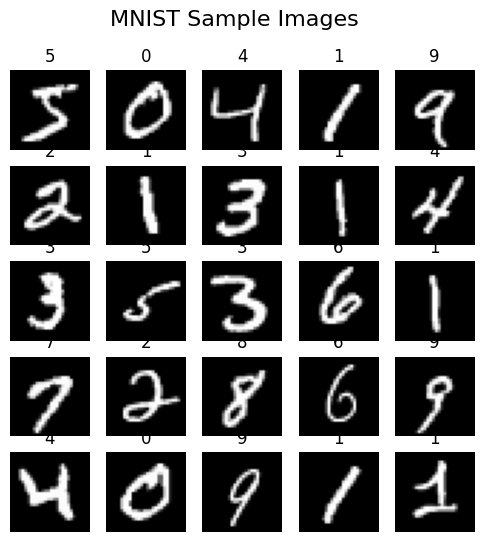

Train: (50000, 784) Val: (10000, 784) Test: (10000, 784)


C:\Users\phamt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 001 - loss: 0.2229, val_loss: 0.1043
Epoch 002 - loss: 0.0829, val_loss: 0.0908
Epoch 003 - loss: 0.0545, val_loss: 0.1067
Epoch 004 - loss: 0.0411, val_loss: 0.0803
Epoch 005 - loss: 0.0309, val_loss: 0.0916
Epoch 006 - loss: 0.0290, val_loss: 0.0847
Epoch 007 - loss: 0.0229, val_loss: 0.0948
Epoch 008 - loss: 0.0220, val_loss: 0.0858
Epoch 009 - loss: 0.0143, val_loss: 0.0938
Epoch 010 - loss: 0.0151, val_loss: 0.1233
Epoch 011 - loss: 0.0151, val_loss: 0.0898
Epoch 012 - loss: 0.0144, val_loss: 0.1018
Epoch 013 - loss: 0.0135, val_loss: 0.1019
Epoch 014 - loss: 0.0107, val_loss: 0.0945
Epoch 015 - loss: 0.0120, val_loss: 0.1156
Epoch 016 - loss: 0.0157, val_loss: 0.0955
Epoch 017 - loss: 0.0078, val_loss: 0.1101
Epoch 018 - loss: 0.0094, val_loss: 0.0976
Epoch 019 - loss: 0.0107, val_loss: 0.1104
Epoch 020 - loss: 0.0106, val_loss: 0.0991


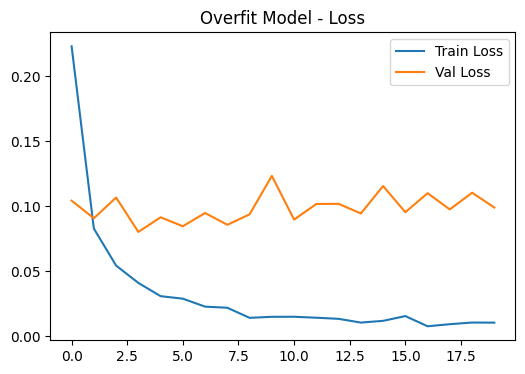

Epoch 001 - loss: 0.7566, val_loss: 0.4145
Epoch 002 - loss: 0.4146, val_loss: 0.3033
Epoch 003 - loss: 0.3293, val_loss: 0.2580
Epoch 004 - loss: 0.2884, val_loss: 0.2312
Epoch 005 - loss: 0.2642, val_loss: 0.2320
Epoch 006 - loss: 0.2501, val_loss: 0.2135
Epoch 007 - loss: 0.2435, val_loss: 0.2063
Epoch 008 - loss: 0.2373, val_loss: 0.2062
Epoch 009 - loss: 0.2281, val_loss: 0.2063
Epoch 010 - loss: 0.2269, val_loss: 0.1908
Epoch 011 - loss: 0.2247, val_loss: 0.1900
Epoch 012 - loss: 0.2205, val_loss: 0.1938
Epoch 013 - loss: 0.2187, val_loss: 0.1847
Epoch 014 - loss: 0.2140, val_loss: 0.1889
Epoch 015 - loss: 0.2146, val_loss: 0.1918
Epoch 016 - loss: 0.2148, val_loss: 0.1879
Epoch 017 - loss: 0.2105, val_loss: 0.1803
Epoch 018 - loss: 0.2102, val_loss: 0.1916
Epoch 019 - loss: 0.2088, val_loss: 0.1836
Epoch 020 - loss: 0.2073, val_loss: 0.1874


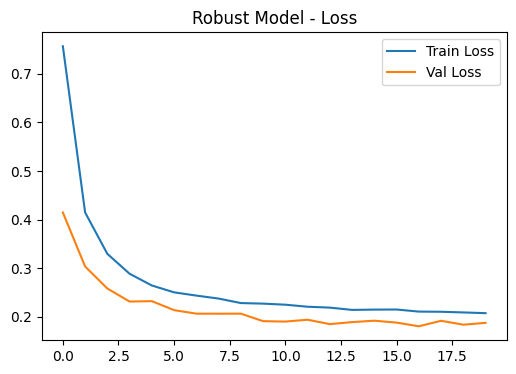

Overfit model test accuracy: 0.9814000129699707
Robust model test accuracy: 0.9775000214576721


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ===== 1. Load MNIST =====
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Visualize một số ảnh MNIST
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(int(y_train[i]))
    plt.axis("off")
plt.suptitle("MNIST Sample Images", fontsize=16)
plt.show()

# Chuẩn hoá dữ liệu về [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 -> 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Chia train/val
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

print("Train:", x_train.shape, "Val:", x_val.shape, "Test:", x_test.shape)

# ===== 2. Model Overfit (quá to, không regularization) =====
def build_overfit_model():
    model = keras.Sequential([
        layers.Dense(1024, activation="relu", input_shape=(784,)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ===== 3. Model Robust (nhỏ gọn + regularization) =====
def build_robust_model():
    model = keras.Sequential([
        layers.Dense(256, activation="relu", input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ===== 4. Train + log loss =====
def train_and_plot(model_fn, title):
    model = model_fn()

    log_callback = keras.callbacks.LambdaCallback(
        on_epoch_end=lambda epoch, logs:
            print(f"Epoch {epoch+1:03d} - loss: {logs['loss']:.4f}, val_loss: {logs['val_loss']:.4f}")
    )

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=20, batch_size=128, verbose=0,
        callbacks=[log_callback]
    )

    # Plot loss
    plt.figure(figsize=(6,4))
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title(f"{title} - Loss")
    plt.legend()
    plt.show()

    return model

# Train Overfit model
overfit_model = train_and_plot(build_overfit_model, "Overfit Model")

# Train Robust model
robust_model = train_and_plot(build_robust_model, "Robust Model")

# ===== 5. Đánh giá trên test set =====
print("Overfit model test accuracy:", overfit_model.evaluate(x_test, y_test, verbose=0)[1])
print("Robust model test accuracy:", robust_model.evaluate(x_test, y_test, verbose=0)[1])
